In [2]:
%matplotlib inline

import pickle as pkl
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from scipy.io import loadmat

In [5]:
trainset = loadmat('data/train_32x32.mat')
testset = loadmat('data/test_32x32.mat')

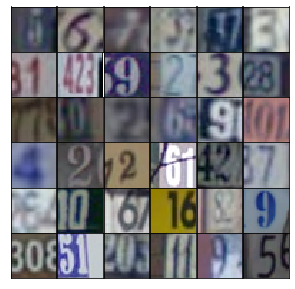

In [6]:
idx = np.random.randint(0, trainset['X'].shape[3], size=36)
fig, axes = plt.subplots(6, 6, sharex=True, sharey=True, figsize=(5,5),)
for ii, ax in zip(idx, axes.flatten()):
    ax.imshow(trainset['X'][:,:,:,ii], aspect='equal')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)

In [8]:
#正規化
def scale(x, feature_ranges=(-1,1)):
    x = ((x-x.min())/(255-x.min()))#0~1
    
    min, max = feature_ranges
    x = x * (max - min) + min#-1~1
    return x

In [10]:
class Dataset:
    def __init__(self, train, test, val_frac=0.5, shuffle=False, scale_func=None):
        split_index = int(len(test['y'])*(1-val_frac))
        self.test_x, self.valid_x = test['X'][:,:,:,:split_index], test['X'][:,:,:,split_index:]
        self.test_y, self.valid_y = test['y'][:split_index], test['y'][split_index:]
        self_train_x, self.train_y = train['X'], train['y']
        
        self.train_x = np.rollaxis(self.train_x, 3)#tensorflow形式に変換
        self.valid_x= np.rollaxis(self.valid_x, 3)# index3番目を一番前に持ってくる[index, R, G, B]
        self.test_x = np.rollaxis(self.test_x, 3)
        
        if scale_func is None:
            self.scaler = scale
        else:
            self.scaler = scale_func
        self.shuffle = shuffle
        
        def batches(self, batch_size):
            if self.shuffle:
                idx = np.arrange(len(dataset.train_x))
                np.random.shuffle(idx)
                self.train_x = self.train_x[idx]
                self.train_y = self.train_y[idx]
                
            n_batches = len(self.train_y) // batch_size
            for ii in range(0, len(self.train_y), batch_size):
                x = self.train_x[ii:ii+batch_size]
                y = self.train_y[ii:ii+batch_size]
                
                yield self.scaler(x), y